Machine Learning

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import pandas.util.testing as tm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """


In [3]:
data_df=pd.read_csv('/content/drive/MyDrive/Data Analytics/DataSets/Startups.csv')


In [4]:
data_df.head()
#Columns = R&D Spend, Administration, Marketing Spend, Profit

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [5]:
# Define x and y
x=data_df.drop(['Profit'], axis=1).values # create the independent variables dataframe (R&D Spend, Administration, Marketing Spend)
y=data_df['Profit'].values # create the dependent variable array (Profit)
   

In [6]:
print(x) # display independent variables

[[165349.2  136897.8  471784.1 ]
 [162597.7  151377.59 443898.53]
 [153441.51 101145.55 407934.54]
 [144372.41 118671.85 383199.62]
 [142107.34  91391.77 366168.42]
 [131876.9   99814.71 362861.36]
 [134615.46 147198.87 127716.82]
 [130298.13 145530.06 323876.68]
 [120542.52 148718.95 311613.29]
 [123334.88 108679.17 304981.62]
 [101913.08 110594.11 229160.95]
 [100671.96  91790.61 249744.55]
 [ 93863.75 127320.38 249839.44]
 [ 91992.39 135495.07 252664.93]
 [119943.24 156547.42 256512.92]
 [114523.61 122616.84 261776.23]
 [ 78013.11 121597.55 264346.06]
 [ 94657.16 145077.58 282574.31]
 [ 91749.16 114175.79 294919.57]
 [ 86419.7  153514.11      0.  ]
 [ 76253.86 113867.3  298664.47]
 [ 78389.47 153773.43 299737.29]
 [ 73994.56 122782.75 303319.26]
 [ 67532.53 105751.03 304768.73]
 [ 77044.01  99281.34 140574.81]
 [ 64664.71 139553.16 137962.62]
 [ 75328.87 144135.98 134050.07]
 [ 72107.6  127864.55 353183.81]
 [ 66051.52 182645.56 118148.2 ]
 [ 65605.48 153032.06 107138.38]
 [ 61994.4

In [7]:
#print(y) to display target variable values
print(y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


In [8]:
# Split dataset into training and testing datasets
from sklearn.model_selection import train_test_split # get the train test and split function from the sklearn library
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0) # will test on 30% of data


In [9]:
# train the Model on the Training set
from sklearn.linear_model import LinearRegression
ml=LinearRegression() # create the model
ml.fit(x_train,y_train) # fit the model
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [10]:
# Use trained model to predict the target variable (we know these values, it's how we can tell the accuracy of the model before putting into production)
y_pred = ml.predict(x_test)
print(y_pred)


[104054.44293869 132719.3459701  133640.26830949  72294.76911458
 179685.62227843 114508.97572031  66305.23069863  98297.69326565
 114277.91894933 169112.36095691  96257.40152149  87916.97242208
 110687.33942598  90670.8337806  127780.63539583]


In [14]:
# input a row of values for the independent variables and see how close it gets to predicting the already known target variable
ml.predict([[22177.74, 154806.14, 28334.72]])  # the actual value for profit is 65200.33, if you refit the model, the prediction will (should) change

array([65689.34055377])

In [16]:
# R-Square tells how much of the variation in the dependent variable can be explained by the independent variables used in the regression
# This means, 94% of the variation can be explain, which means the independent variables are HIGHLY correlated to profits
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9355188337118219

### **Plot Results**

Text(0.5, 1.0, 'Actual vs. Predicted')

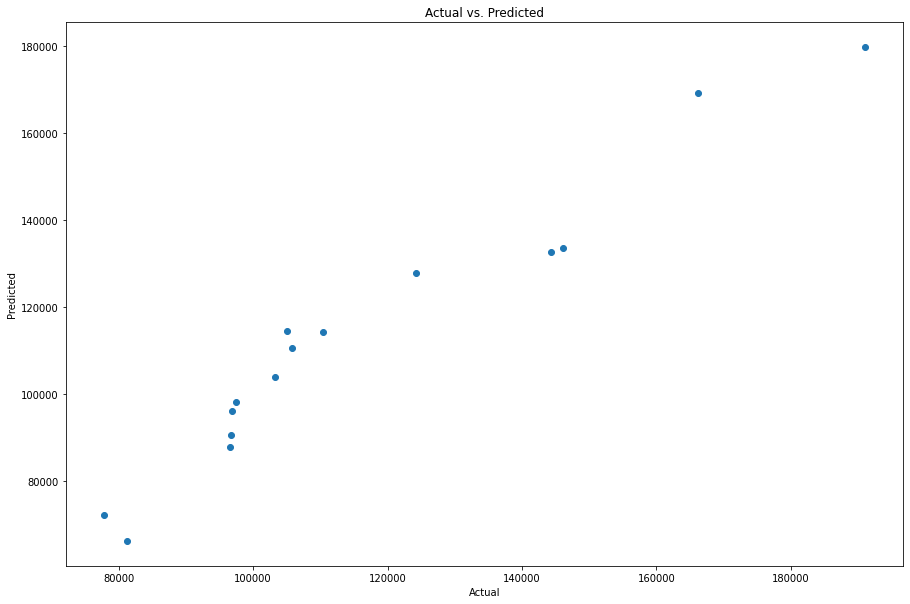

In [17]:
# Plot the actual values and the predicte values (y)
import matplotlib.pyplot as plt 
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred) 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
# This dataset does not have very many records, but this shows a high positive correlation

Predicted Values

In [18]:
#Predicted Values of "y" from the test set
pred_y_df=pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':y_test - y_pred})
pred_y_df[0:20]
#Differences seem high, but since most our profits lie between 100 and 200,000, being able to predict profits within $10,000 of accuracy in awesome
# Especially when the prediction is being made by a glorified adding machine

,Actual Value,Predicted Value,Difference
0,103282.38,104054.442939,-772.062939
1,144259.40,132719.345970,11540.054030
2,146121.95,133640.268309,12481.681691
3,77798.83,72294.769115,5504.060885
4,191050.39,179685.622278,11364.767722
5,105008.31,114508.975720,-9500.665720
6,81229.06,66305.230699,14923.829301
7,97483.56,98297.693266,-814.133266
8,110352.25,114277.918949,-3925.668949
9,166187.94,169112.360957,-2924.420957
